# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.72462832, 0.57361392, 0.36783573])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [10]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    return z

## Logistic Function

## $p = \frac{1}{1 + e^{-z}}$

In [11]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z)) 
    return p

In [12]:
logistic(X_train.iloc[1], parameters)

0.8054723641712777

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = \Sigma{y_i\log(p_i) + (1 - y_i)\log(1 - p_i)}$ 

In [13]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -(y * np.log(p) + (1-y) * np.log(1-p))
    return loss

In [14]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters)
    loss = np.power((y_hat-y), 2) / 2
    return loss

In [15]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss / X_set.shape[0]
    return loss

In [16]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.1876496745965934

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= (y_i - \theta^{T}X_i)*X_i$ 
## ${\partial\over{\partial \theta_j}}l(p)= (y_i - p_i)*X_i$

In [17]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)
        gradient = (y_hat - y) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = - (y - p) * X[j]
    return gradient

In [18]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.07486961672077158

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [19]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [20]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[55.18597702631628, 7.231182814101797, 37.3600857876166]

## mini-batch
인덱스로 미니 배치 나누기

In [21]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요   
총 샘플 수 // batch_size + 1 로 배치의 총 개수를 계산한 이후, batch_size 씩 인덱스를 나워 idx_list에 담아 return이 때,  
마지막 배치의 크기 < batch_size일 수 있음

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [36]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n
    
    parameters -= gradients
    return parameters

In [37]:
step(parameters, gradients1, 0.01, len(X_train))

array([ 0.17273176,  0.50129727, -0.00579003])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  
- num_epoch:
<br>

BGD: 학습 한 번에 모든 데이터셋을 사용하여 기울기를 업데이트
SGD: 학습 한 번에 임의의 1개 데이터만 사용하여 기울기 업데이트 
MGD: 학습 한 번에 데이터셋의 일부만 사용하여 기울기 업데이트
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD
batch_size=k -> MGD
batch_size=whole ->BGD

In [38]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [39]:
new_param_bgd = gradient_descent(X_train, y_train)
new_param_bgd

epoch: 0  loss: 0.8131140040179834  params: [-0.03815028  0.30218447  0.07194191]  gradients: [0.04274396347627536, 0.039795324761372014, 0.05378928506109098]
epoch: 100  loss: 0.1982175814288324  params: [-1.56202676  3.07285345 -3.020279  ]  gradients: [0.0074069913797305004, 0.01091302493324946, 0.014515902243624207]


array([-1.6963365 ,  3.53565051, -3.43445885])

In [40]:
new_param_sgd = gradient_descent(X_train, y_train, learning_rate=0.01)
new_param_sgd

epoch: 0  loss: 1.3143769275082045  params: [0.48610005 0.66096858 0.19397716]  gradients: [0.005925418137593511, 0.005413217305353089, 0.006826541599413519]
epoch: 100  loss: 0.3891403308859842  params: [-0.85395459  0.94949059 -0.94183555]  gradients: [0.0013663358825157308, 0.0014798473198667729, 0.002430161993024417]


array([-1.07516123,  1.42558287, -1.41207857])

In [41]:
new_param_mgd = gradient_descent(X_train, y_train, learning_rate=0.3)
new_param_mgd

epoch: 0  loss: 0.6382163308088985  params: [-0.40568072  0.35746327 -0.07235833]  gradients: [0.11053939102783258, 0.10724813189412423, 0.14753804541286722]
epoch: 100  loss: 0.15278119980411708  params: [-1.88474249  4.03010235 -3.95164161]  gradients: [0.021015563163061104, 0.031966446778778086, 0.03822965551470472]
epoch: 200  loss: 0.1441946048126026  params: [-1.97123775  4.29672096 -4.19924455]  gradients: [0.020732327372588708, 0.031635639872853887, 0.03694560741922436]
epoch: 300  loss: 0.14286689095538918  params: [-1.98551452  4.3405959  -4.23989355]  gradients: [0.020692830157610524, 0.03158554308627181, 0.03674795979042066]
epoch: 400  loss: 0.142635926970442  params: [-1.98802483  4.34830697 -4.24703486]  gradients: [0.020686076859176415, 0.031576856575045886, 0.03671360217504817]
epoch: 500  loss: 0.14259496702597507  params: [-1.98847085  4.34967695 -4.24830353]  gradients: [0.020684882838764355, 0.03157531694499477, 0.03670750983127169]
epoch: 600  loss: 0.142587678409

array([-1.98856743,  4.34997358, -4.24857822])

### Predict Label

In [42]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [43]:
from sklearn.metrics import *

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 2,  8]], dtype=int64)

In [45]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.92


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [46]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [47]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [48]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.77905783, 2.34487792])

In [50]:
#경사하강법
new_param = gradient_descent(X, y, 0.1, model='linear')
new_param

epoch: 0  loss: 0.7509638286682428  params: [0.99477458 1.14479689]  gradients: [-0.019656117709414014, -0.0024063034397704204]
epoch: 100  loss: 0.8993242646524782  params: [0.81213225 2.16217854]  gradients: [0.02912950939506979, 0.034696666675592694]
epoch: 200  loss: 0.899462933262375  params: [0.81171952 2.16293542]  gradients: [0.02913379536703537, 0.03470524731931194]
epoch: 300  loss: 0.8994630546095062  params: [0.81171916 2.16293608]  gradients: [0.02913379911700645, 0.034705254826865865]
epoch: 400  loss: 0.8994630547156778  params: [0.81171916 2.16293608]  gradients: [0.029133799120287473, 0.034705254833434555]
epoch: 500  loss: 0.899463054715769  params: [0.81171916 2.16293608]  gradients: [0.029133799120290255, 0.03470525483344019]
epoch: 600  loss: 0.899463054715769  params: [0.81171916 2.16293608]  gradients: [0.029133799120290255, 0.03470525483344019]
epoch: 700  loss: 0.899463054715769  params: [0.81171916 2.16293608]  gradients: [0.029133799120290255, 0.0347052548334

array([0.81171916, 2.16293608])

In [51]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

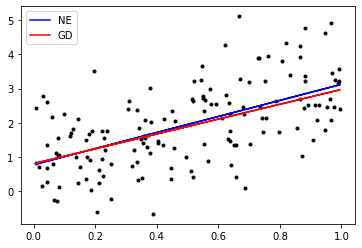

In [52]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()